In [2]:
import pandas as pd

xls = pd.ExcelFile("./data/Fulldata.xlsx")
data = pd.read_excel(xls)

#4204 site 1 the one used 
snapselected = "4204"

selected = []

for name in data["name"]:
    if name.find(snapselected) > 0:
        l = list(data[data["name"] == name].values[0])        
        selected.append(l)

for n in data.columns:
    print("%8s "%(n), end="")   

print("")

for v in selected:
    for i, sv in enumerate(v):
        if i == 0:
            print("%8s "%(sv[-8:]), end="")
        else:
            print("%8.4f "%(sv), end="")


    print("")  

    name   sscore    ssize   dscore   volume sexposure senclosure sbalance linearity planarity sphericity anisotropy 
n_site_2   0.9439  40.0000   0.8910  70.9581   0.4118   0.9687   3.9198   0.5960   0.3493   0.0547   0.9453 
n_site_1   0.8760  57.0000   0.7621 114.1333   0.3448   0.7812   0.7148   0.1110   0.5419   0.3472   0.6528 
n_site_3   0.6893  34.0000   0.4511 145.1747   0.5904   0.6904   0.1183   0.8964   0.0559   0.0476   0.9524 
n_site_4   0.4646  13.0000   0.4000  35.5005   0.7759   0.5206   0.8178   0.7522   0.1940   0.0538   0.9462 
n_site_5   0.4581  15.0000   0.4189  37.9015   0.8193   0.4498   0.4442   0.8215   0.0947   0.0838   0.9162 


In [3]:
# In pratica questi sono i vari siti individuati nello snapshot della dinamica 

In [4]:
print(data.columns)


Index(['name', 'sscore', 'ssize', 'dscore', 'volume', 'sexposure',
       'senclosure', 'sbalance', 'linearity', 'planarity', 'sphericity',
       'anisotropy'],
      dtype='object')


('sphericity', 'anisotropy') 0.9999999999999988
('anisotropy', 'sphericity') 0.9999999999999988
('sscore', 'ssize') 0.8955251170847576
('ssize', 'sscore') 0.8955251170847576
('linearity', 'planarity') 0.8815509400637974
('planarity', 'linearity') 0.8815509400637974
('sscore', 'dscore') 0.8645357965990296
('dscore', 'sscore') 0.8645357965990296
('ssize', 'volume') 0.8167498086664703
('volume', 'ssize') 0.8167498086664703
('ssize', 'dscore') 0.813470718041173
('dscore', 'ssize') 0.813470718041173
('sexposure', 'sscore') 0.7736838269251762
('sscore', 'sexposure') 0.7736838269251762
('sexposure', 'senclosure') 0.7668443039223555
('senclosure', 'sexposure') 0.7668443039223555
('sscore', 'volume') 0.7067576349454726
('volume', 'sscore') 0.7067576349454726


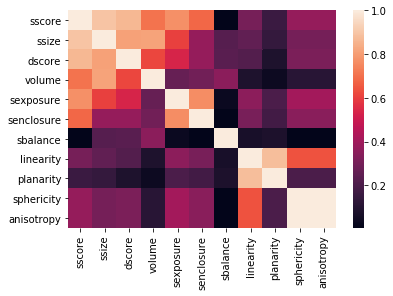

In [6]:
# queste sono quelle autocalcolate 
#        linearity 
#        planarity
#        sphericity 
#        anisotropy 

import seaborn as sns

corr = data.corr().abs()

s = corr.unstack()
so = s.sort_values(kind="quicksort", ascending=False)

for s in so.index:
    if so[s] < 1.0 and so[s] > 0.7:
        print (s, so[s])

sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)



In [7]:

first = {}
N = 200

for cname in data.columns:
    if cname != "name":
       first[cname] = data.sort_values(by=[cname], ascending=False).head(N)

print("Looking for ", snapselected)
    
for k in first:
    d =first[k]
    for name in d["name"]:
        if name.find(snapselected) > 0:
            print(name, " in ", k)


Looking for  4204
e200k_4204.jrun_site_2  in  sscore
e200k_4204.jrun_site_2  in  dscore
e200k_4204.jrun_site_2  in  senclosure


In [8]:
N = 10
print(first["sscore"].sort_values(by=["anisotropy"], ascending=False).head(N))

                         name   sscore  ssize   dscore     volume  sexposure  \
15249  e200k_4922.jrun_site_1  0.93995    118  0.93973  289.19187    0.63580   
7511   e200k_4932.jrun_site_1  0.92976     98  0.88809  238.59938    0.64364   
19287  e200k_4898.jrun_site_1  0.95366    110  0.95013  259.82250    0.60854   
17245  e200k_4911.jrun_site_1  0.93473     93  0.87798  266.55388    0.66058   
17342  e200k_4970.jrun_site_1  0.93508    118  0.93668  288.97750    0.63009   
18640  e200k_5189.jrun_site_1  0.93834    115  0.93395  314.78825    0.62171   
1522   e200k_5157.jrun_site_1  0.92995     92  0.88344  250.73300    0.62602   
9441   e200k_5153.jrun_site_1  0.93034     90  0.89708  266.21087    0.61373   
17740  e200k_5161.jrun_site_1  0.96475     97  0.92329  291.42138    0.61355   
15447  e200k_5141.jrun_site_1  0.94050    101  0.94022  264.79600    0.64311   

       senclosure  sbalance  linearity  planarity  sphericity  anisotropy  
15249     0.60820   0.26991    0.97212    0

In [9]:
# vediamo i valori per il sito selezionato che dovrebbe essere e200k_4204.jrun_site_2
print(data[data["name"] == "e200k_4204.jrun_site_1"])


                        name   sscore  ssize   dscore     volume  sexposure  \
2832  e200k_4204.jrun_site_1  0.87597     57  0.76211  114.13325    0.34483   

      senclosure  sbalance  linearity  planarity  sphericity  anisotropy  
2832     0.78115   0.71482    0.11096    0.54185     0.34719     0.65281  


In [10]:
# sitescore > 0.8, exposure < 0.49, enclosure < 0.78, phobic/philic balance ≈ 1.0.
filter1 = data[data["sscore"] > 0.8]
filter12 = filter1[filter1["sexposure"] < 0.49]
filter123 = filter12[filter12["senclosure"] < 0.79]
filter1234 = filter123[filter123["sbalance"] < 1.3] 
filter1234 = filter1234[filter1234["sbalance"] > 0.7]

# in realta' per i filtri devo usare valori leggermente diversi per farlo rientrare 

print("There are ", len(filter1234))

for name in filter1234["name"]:
    if name.find(snapselected) >= 0:
        print(name, " found ")
        
        

There are  192
e200k_4204.jrun_site_1  found 


range for  planarity  is  0.76252 0.01695
   0.314625
range for  linearity  is  0.8355 0.03538
   0.3992291145833333
range for  anisotropy  is  0.94274 0.2266
   0.71385453125
range for  sphericity  is  0.7734 0.05726
   0.28614546875
                        name   sscore  ssize   dscore     volume  sexposure  \
2832  e200k_4204.jrun_site_1  0.87597     57  0.76211  114.13325    0.34483   

      senclosure  sbalance  linearity  planarity  sphericity  anisotropy  
2832     0.78115   0.71482    0.11096    0.54185     0.34719     0.65281  


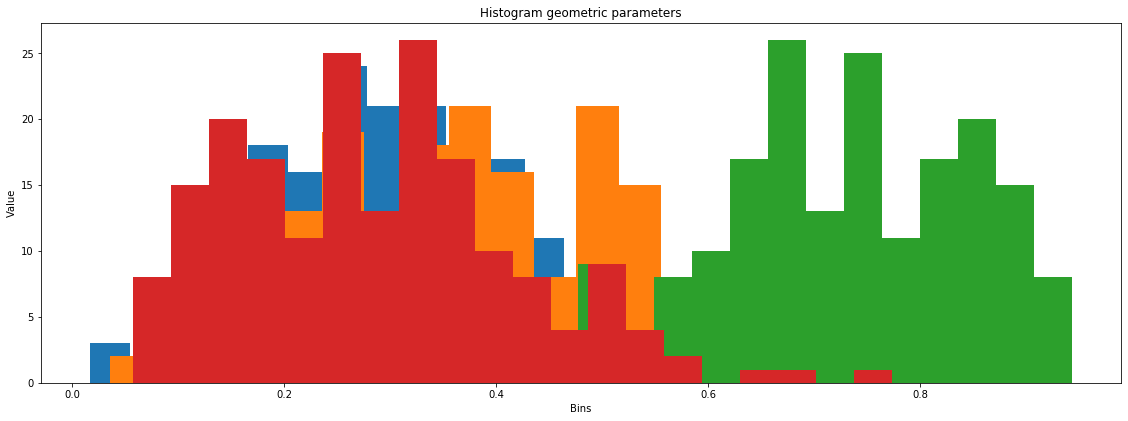

In [11]:
import matplotlib.pyplot as plt
import numpy

fig = plt.figure(figsize = (15,5))

ax = fig.add_axes([0,0,1,1])

ax.set_title('Histogram geometric parameters')
ax.set_xlabel('Bins')
ax.set_ylabel('Value')

for ln in ["planarity", "linearity", "anisotropy", "sphericity"]:
    plt.hist(filter1234[ln].values, bins = 20, label=ln)
    print("range for ", ln , " is ", max(filter1234[ln].values), min(filter1234[ln].values))
    print("  ",numpy.mean(filter1234[ln].values))
    
print(data[data["name"] == "e200k_4204.jrun_site_1"])

plt.show()




In [13]:
#N = 10
#print(filter1234.sort_values(by=["planarity"], ascending=False).head(N))
# posso immaginare una cosa del genere, selezione in base ai filtri e poi 
# prendo tutti i siti con valore di sfericità planarità e anisotropia maggiori del valore medio
# planarity > medio  sphericity > medio 
finalselection = filter1234[filter1234["planarity"] > numpy.mean(filter1234["planarity"].values)]
finalselection = finalselection[finalselection["sphericity"] > numpy.mean(filter1234["sphericity"].values)]
#finalselection = finalselection[finalselection["anisotropy"] > numpy.mean(filter1234["anisotropy"].values)]

print(len(finalselection))

print(finalselection.sort_values(by=["sscore"], ascending=False))

36
                         name   sscore  ssize   dscore     volume  sexposure  \
6188   e200k_4530.jrun_site_2  0.93962     73  0.90524  127.46738    0.41129   
11933  e200k_8781.jrun_site_1  0.93079     71  0.86937  133.59850    0.36036   
19551  e200k_4946.jrun_site_2  0.91823     67  0.82919  119.49263    0.39091   
9197   e200k_5863.jrun_site_1  0.91724     69  0.92255  140.88725    0.44355   
6435   e200k_5530.jrun_site_1  0.91568     66  0.82199  138.57200    0.35294   
1854   e200k_4248.jrun_site_1  0.90201     66  0.82068  132.18363    0.40541   
19197  e200k_4073.jrun_site_1  0.89769     63  0.81064  119.10675    0.41667   
5145   e200k_3370.jrun_site_1  0.89453     64  0.82438  130.98313    0.43363   
14671  e200k_3379.jrun_site_1  0.89428     62  0.80824  127.46738    0.42056   
17423  e200k_3729.jrun_site_1  0.89363     63  0.79093  122.45100    0.45217   
15214  e200k_9010.jrun_site_1  0.89348     67  0.88701  135.39925    0.47656   
13298  e200k_2424.jrun_site_1  0.8821

In [14]:
conformers = set()
for n in finalselection["name"].values:
    conformer = n.replace("e200k_", "").split(".")[0]
    conformers.add(conformer)
    
print("How many conformers ", len(conformers))


How many conformers  36


In [15]:
for n in finalselection["name"].values:
    print(n)
    

e200k_3958.jrun_site_2
e200k_4248.jrun_site_1
e200k_4133.jrun_site_1
e200k_5810.jrun_site_1
e200k_4204.jrun_site_1
e200k_4080.jrun_site_1
e200k_4544.jrun_site_1
e200k_4038.jrun_site_2
e200k_3370.jrun_site_1
e200k_4530.jrun_site_2
e200k_5530.jrun_site_1
e200k_4174.jrun_site_1
e200k_3173.jrun_site_1
e200k_3235.jrun_site_1
e200k_5863.jrun_site_1
e200k_5977.jrun_site_1
e200k_4627.jrun_site_1
e200k_8781.jrun_site_1
e200k_8613.jrun_site_1
e200k_2424.jrun_site_1
e200k_3379.jrun_site_1
e200k_3135.jrun_site_1
e200k_9010.jrun_site_1
e200k_4065.jrun_site_1
e200k_2673.jrun_site_1
e200k_3053.jrun_site_1
e200k_3729.jrun_site_1
e200k_5471.jrun_site_1
e200k_3342.jrun_site_1
e200k_3205.jrun_site_1
e200k_4073.jrun_site_1
e200k_4169.jrun_site_1
e200k_4946.jrun_site_2
e200k_4927.jrun_site_2
e200k_2272.jrun_site_2
e200k_5451.jrun_site_1
